In [34]:
import os
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

In [9]:
ecdc_path = '../Datasets/DLL/ECDC/DLL_COVID_TRAIN.csv'

In [87]:
data = pd.read_csv(ecdc_path, parse_dates=['dateRep'])
data.head()

,countryterritoryCode,dateRep,cases,deaths,countriesAndTerritories,popData2018,GDP (current US$),GDP per capita (current US$),Access to electricity (% of population),Current health expenditure per capita (current US$),Current health expenditure (% of GDP),"Hospital beds (per 1,000 people)"
0,AFG,2020-04-18,51,1,Afghanistan,37172386.0,1.936297e+10,520.896603,97.7,67.12265,11.777194,0.5
1,AFG,2020-04-17,10,4,Afghanistan,37172386.0,1.936297e+10,520.896603,97.7,67.12265,11.777194,0.5
2,AFG,2020-04-16,70,2,Afghanistan,37172386.0,1.936297e+10,520.896603,97.7,67.12265,11.777194,0.5
3,AFG,2020-04-15,49,2,Afghanistan,37172386.0,1.936297e+10,520.896603,97.7,67.12265,11.777194,0.5
4,AFG,2020-04-14,58,3,Afghanistan,37172386.0,1.936297e+10,520.896603,97.7,67.12265,11.777194,0.5


In [88]:
country_keys = list(set(data['countryterritoryCode']))

In [89]:
country='AFG'
afg = data[data.countryterritoryCode=='AFG']


In [90]:
country_data = {}
for key in country_keys:
    d = data[data.countryterritoryCode==key]
    country_data[key] = d

In [81]:
afg = country_data['AFG']
dates = list(afg.dateRep)
cases = list(afg.cases)
dates.reverse()
cases.reverse()

In [85]:
dates = afg.dateRep
type(dates[0])
#afg.plot.scatter(x='dateRep', y='cases')

str

In [101]:
len(data.countryterritoryCode.unique())

202

In [27]:
missing = data[(data.isnull().any(axis=1))]
missing_countries = missing.countryterritoryCode.unique()

In [28]:
full_data = data[~data.countryterritoryCode.isin(missing_countries)]
full_data.isnull().values.any()

country_info = full_data[(full_data['dateRep'] == '2020-04-18')]
country_info

,countryterritoryCode,dateRep,cases,deaths,countriesAndTerritories,popData2018,GDP (current US$),GDP per capita (current US$),Access to electricity (% of population),Current health expenditure per capita (current US$),Current health expenditure (% of GDP),"Hospital beds (per 1,000 people)",dates
0,AFG,2020-04-18,51,1,Afghanistan,37172386.0,1.936297e+10,520.896603,97.700000,67.122650,11.777194,0.5,2020-04-18
141,DZA,2020-04-18,150,16,Algeria,42228429.0,1.737580e+11,4114.715061,100.000000,258.494293,6.374322,1.9,2020-04-18
246,AND,2020-04-18,14,2,Andorra,77006.0,3.236544e+09,42029.762737,100.000000,4040.786621,10.320552,2.5,2020-04-18
282,AGO,2020-04-18,0,0,Angola,30809762.0,1.057510e+11,3432.385736,41.886230,114.459641,2.791500,0.8,2020-04-18
310,ATG,2020-04-18,0,0,Antigua_and_Barbuda,96286.0,1.610574e+09,16726.980808,100.000000,673.859680,4.533532,3.8,2020-04-18
340,ARG,2020-04-18,98,7,Argentina,44494502.0,5.198715e+11,11683.949622,100.000000,1324.603516,9.124315,5.0,2020-04-18
383,ARM,2020-04-18,47,1,Armenia,2951776.0,1.243309e+10,4212.070943,100.000000,407.635864,10.362705,4.2,2020-04-18
511,AUS,2020-04-18,36,4,Australia,24992369.0,1.433904e+12,57373.686684,100.000000,5331.817871,9.205948,3.8,2020-04-18
621,AUT,2020-04-18,155,21,Austria,8847037.0,4.552858e+11,51461.954780,100.000000,4939.875488,10.396617,7.6,2020-04-18
731,AZE,2020-04-18,57,0,Azerbaijan,9942334.0,4.693953e+10,4721.178087,100.000000,275.809357,6.651829,4.7,2020-04-18


In [29]:
X = country_info.iloc[:, [7, 8, 9, 11]].values
countries = list(country_info.iloc[:, 0].values)

countries

['AFG',
 'DZA',
 'AND',
 'AGO',
 'ATG',
 'ARG',
 'ARM',
 'AUS',
 'AUT',
 'AZE',
 'BHS',
 'BHR',
 'BGD',
 'BRB',
 'BLR',
 'BEL',
 'BLZ',
 'BEN',
 'BTN',
 'BOL',
 'BIH',
 'BWA',
 'BRA',
 'BRN',
 'BGR',
 'BFA',
 'BDI',
 'KHM',
 'CMR',
 'CAN',
 'CPV',
 'CAF',
 'TCD',
 'CHL',
 'CHN',
 'COL',
 'COG',
 'CRI',
 'CIV',
 'HRV',
 'CUB',
 'CYP',
 'CZE',
 'COD',
 'DNK',
 'DJI',
 'DMA',
 'DOM',
 'ECU',
 'EGY',
 'SLV',
 'GNQ',
 'EST',
 'SWZ',
 'ETH',
 'FJI',
 'FIN',
 'FRA',
 'GAB',
 'GMB',
 'GEO',
 'DEU',
 'GHA',
 'GRC',
 'GRD',
 'GTM',
 'GIN',
 'GNB',
 'GUY',
 'HTI',
 'HND',
 'HUN',
 'ISL',
 'IND',
 'IDN',
 'IRN',
 'IRQ',
 'IRL',
 'ISR',
 'ITA',
 'JAM',
 'JPN',
 'JOR',
 'KAZ',
 'KEN',
 'KWT',
 'KGZ',
 'LAO',
 'LVA',
 'LBN',
 'LBR',
 'LBY',
 'LTU',
 'LUX',
 'MDG',
 'MWI',
 'MYS',
 'MDV',
 'MLI',
 'MLT',
 'MRT',
 'MUS',
 'MEX',
 'MDA',
 'MCO',
 'MNG',
 'MAR',
 'MOZ',
 'MMR',
 'NAM',
 'NPL',
 'NLD',
 'NZL',
 'NIC',
 'NER',
 'NGA',
 'MKD',
 'NOR',
 'OMN',
 'PAK',
 'PAN',
 'PNG',
 'PRY',
 'PER',
 'PHL',


In [191]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA as PCA

X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=3, kernel='cosine').fit(X_scaled)

#pca.explained_variance_ratio_

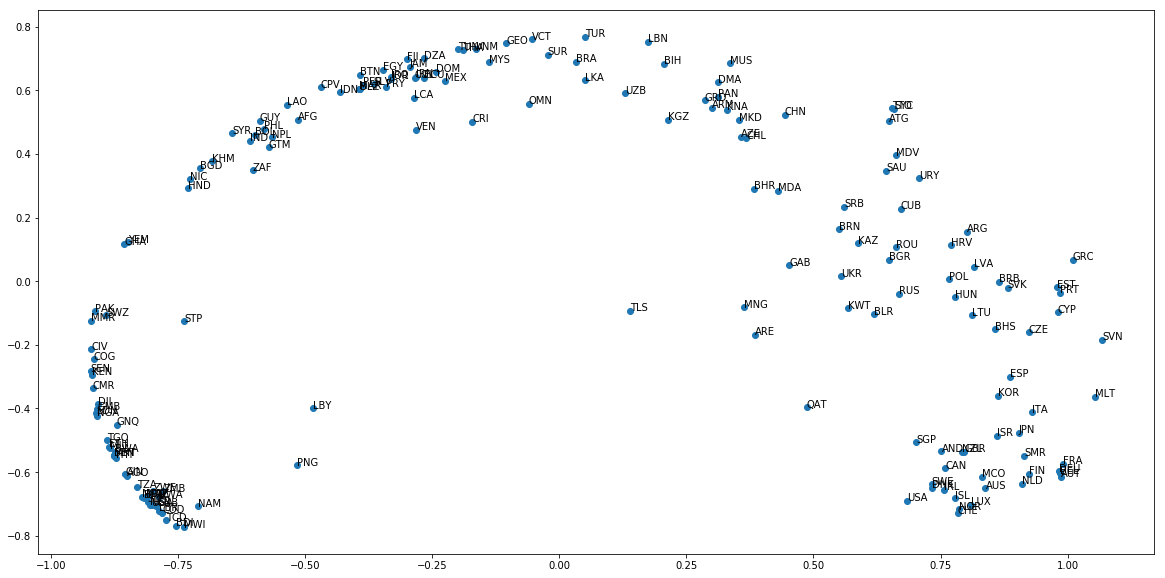

In [192]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [20, 10]

X_projected = pca.transform(X_scaled)

fig, ax = plt.subplots()
ax.scatter(X_projected[:, 0], X_projected[:, 1])

for i, txt in enumerate(countries):
    ax.annotate(txt, (X_projected[i, 0], X_projected[i, 1]))

plt.show()

In [196]:
from sklearn.cluster import KMeans

clusters = KMeans(n_clusters=5).fit_predict(X_projected)

NameError: name 'interestin' is not defined

In [30]:
interesting = [countries.index(e) for e in ['NAM', 'PAK', 'CIV', 'CMR', 'SEN']]
print(clusters[interesting])

NameError: name 'clusters' is not defined

In [58]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [20, 10]

def get_cases_deaths(code):
    df = data[(data['countryterritoryCode'] == code)].iloc[:, [1, 2, 3]]
    df = df.set_index('dateRep')
    return df

african = ['NAM', 'PAK', 'CIV', 'CMR', 'SEN']
african_cases = data[data.countryterritoryCode.isin(african)].iloc[:, [0, 1, 2, 9]]
#african_cases = african_cases.set_index('dateRep')

african_cases = african_cases.pivot(index='dateRep', columns='countryterritoryCode', values=['cases'])
african_cases

cases                         
countryterritoryCode   CIV    CMR  NAM    PAK   SEN
dateRep                                            
2019-12-31             NaN    NaN  NaN    0.0   NaN
2020-01-01             NaN    NaN  NaN    0.0   NaN
2020-01-02             NaN    NaN  NaN    0.0   NaN
2020-01-03             NaN    NaN  NaN    0.0   NaN
2020-01-04             NaN    NaN  NaN    0.0   NaN
2020-01-05             NaN    NaN  NaN    0.0   NaN
2020-01-06             NaN    NaN  NaN    0.0   NaN
2020-01-07             NaN    NaN  NaN    0.0   NaN
2020-01-08             NaN    NaN  NaN    0.0   NaN
2020-01-09             NaN    NaN  NaN    0.0   NaN
2020-01-10             NaN    NaN  NaN    0.0   NaN
2020-01-11             NaN    NaN  NaN    0.0   NaN
2020-01-12             NaN    NaN  NaN    0.0   NaN
2020-01-13             NaN    NaN  NaN    0.0   NaN
2020-01-14             NaN    NaN  NaN    0.0   NaN
2020-01-15             NaN    NaN  NaN    0.0   NaN
2020-01-16             NaN    NaN  NaN    0.0   NaN
2020-01-17             NaN    NaN  NaN    0.0   NaN
2020-01-18             NaN    NaN  NaN    0.0   NaN
2020-01-19             NaN    NaN  NaN    0.0   NaN
2020-01-20             NaN    NaN  NaN    0.0   NaN
2020-01-21             NaN    NaN  NaN    0.0   NaN
2020-01-22             NaN    NaN  NaN    0.0   NaN
2020-01-23             NaN    NaN  NaN    0.0   NaN
2020-01-24             NaN    NaN  NaN    0.0   NaN
2020-01-25             NaN    NaN  NaN    0.0   NaN
2020-01-26             NaN    NaN  NaN    0.0   NaN
2020-01-27             NaN    NaN  NaN    0.0   NaN
2020-01-28             NaN    NaN  NaN    0.0   NaN
2020-01-29             NaN    NaN  NaN    0.0   NaN
...                    ...    ...  ...    ...   ...
2020-03-20             3.0    4.0  0.0  176.0   0.0
2020-03-21             5.0   13.0  1.0   17.0  11.0
2020-03-22             3.0    0.0  0.0  151.0   9.0
2020-03-23             8.0    0.0  0.0  138.0  11.0
2020-03-24             0.0   29.0  0.0  103.0  12.0
2020-03-25            48.0   16.0  0.0  104.0   7.0
2020-03-26             7.0    0.0  1.0   66.0  13.0
2020-03-27            16.0   16.0  4.0  140.0   6.0
2020-03-28             5.0    0.0  0.0    0.0  14.0
2020-03-29            39.0   11.0  0.0  211.0  11.0
2020-03-30            25.0    0.0  3.0  118.0  12.0
2020-03-31             3.0   43.0  0.0   99.0  20.0
2020-04-01             0.0   51.0  0.0  414.0  13.0
2020-04-02            22.0   40.0  2.0  252.0  15.0
2020-04-03             4.0   38.0  0.0    0.0   5.0
2020-04-04            24.0  238.0  1.0    0.0  12.0
2020-04-05            27.0   46.0  0.0  159.0  12.0
2020-04-06            16.0   95.0  2.0  827.0   3.0
2020-04-07            62.0    8.0  0.0  587.0   4.0
2020-04-08            26.0   27.0  0.0  208.0  11.0
2020-04-09            35.0   45.0  0.0  250.0   7.0
2020-04-10            60.0    0.0  0.0  279.0   6.0
2020-04-11            36.0   73.0  0.0  187.0  15.0
2020-04-12            53.0   17.0  0.0  250.0  13.0
2020-04-13            41.0    0.0  0.0  336.0   2.0
2020-04-14            52.0    0.0  0.0  342.0  11.0
2020-04-15             0.0   35.0  0.0  272.0   8.0
2020-04-16            28.0    0.0  0.0  517.0  15.0
2020-04-17            34.0    0.0  0.0  520.0  21.0
2020-04-18            54.0  161.0  0.0  456.0   7.0

[109 rows x 5 columns]

In [64]:
total_cases = data.iloc[:, [0, 1, 2]]
total_cases = total_cases.pivot(index='dateRep', columns='countryterritoryCode', values='cases')

total_cases = total_cases.fillna(0)
total_cases = total_cases.sum(axis=0)

type(total_cases)

pandas.core.series.Series

In [65]:
hc = data[data['dateRep'] == '2020-04-18'].iloc[:, [0, 9]]


pandas.core.frame.DataFrame

In [179]:
pca.lambdas_

array([30.92985761, 24.67615599])

In [133]:
all_data = data.loc[(data['dateRep'] == '2020-04-18')]
print(len(all_data))
all_data

202


,countryterritoryCode,dateRep,cases,deaths,countriesAndTerritories,popData2018,GDP (current US$),GDP per capita (current US$),Access to electricity (% of population),Current health expenditure per capita (current US$),Current health expenditure (% of GDP),"Hospital beds (per 1,000 people)",dates
0,AFG,2020-04-18,51,1,Afghanistan,37172386.0,1.936297e+10,520.896603,97.700000,67.122650,11.777194,0.50,2020-04-18
100,ALB,2020-04-18,21,0,Albania,2866376.0,1.510250e+10,5268.848504,100.000000,NaN,NaN,2.90,2020-04-18
141,DZA,2020-04-18,150,16,Algeria,42228429.0,1.737580e+11,4114.715061,100.000000,258.494293,6.374322,1.90,2020-04-18
246,AND,2020-04-18,14,2,Andorra,77006.0,3.236544e+09,42029.762737,100.000000,4040.786621,10.320552,2.50,2020-04-18
282,AGO,2020-04-18,0,0,Angola,30809762.0,1.057510e+11,3432.385736,41.886230,114.459641,2.791500,0.80,2020-04-18
310,ATG,2020-04-18,0,0,Antigua_and_Barbuda,96286.0,1.610574e+09,16726.980808,100.000000,673.859680,4.533532,3.80,2020-04-18
340,ARG,2020-04-18,98,7,Argentina,44494502.0,5.198715e+11,11683.949622,100.000000,1324.603516,9.124315,5.00,2020-04-18
383,ARM,2020-04-18,47,1,Armenia,2951776.0,1.243309e+10,4212.070943,100.000000,407.635864,10.362705,4.20,2020-04-18
484,ABW,2020-04-18,1,1,Aruba,105845.0,2.700559e+09,25630.266492,100.000000,NaN,NaN,NaN,2020-04-18
511,AUS,2020-04-18,36,4,Australia,24992369.0,1.433904e+12,57373.686684,100.000000,5331.817871,9.205948,3.80,2020-04-18


In [134]:
from sklearn.cluster import KMeans